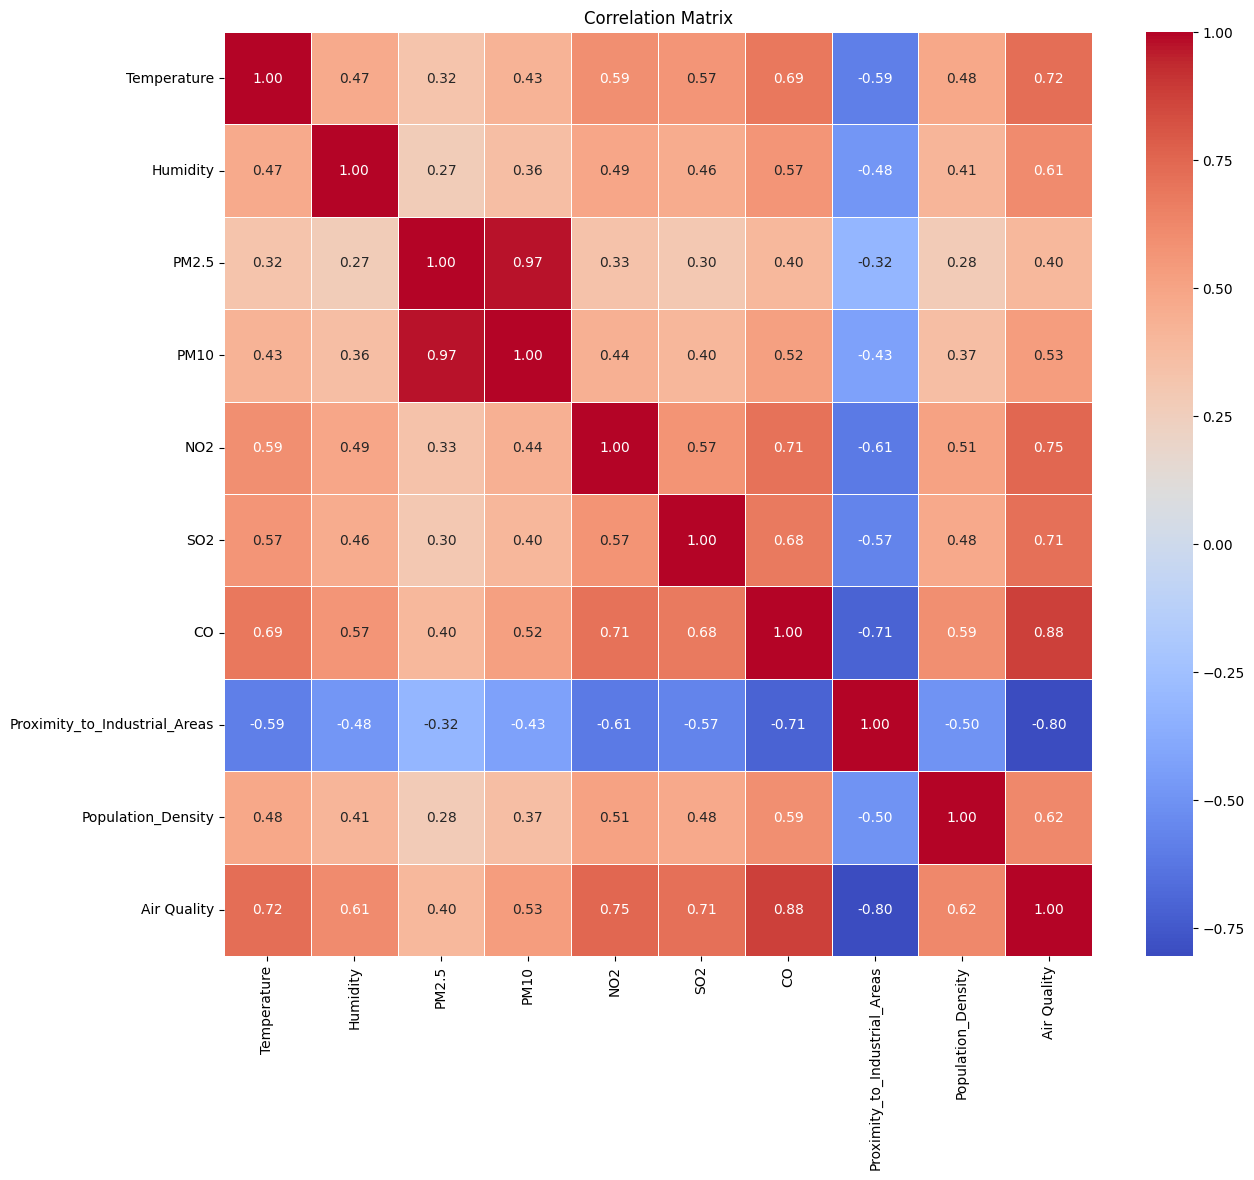

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load dataset
df = pd.read_csv('aq-5000.csv')
df1 = pd.read_csv('pm2.5.csv')

# Initialize LabelEncoder
le = LabelEncoder()
# Encode the labels in the dataset
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])


# Mapping for the new desired order
# Mapping the old encoded values to the new ones:
label_mapping = {0: 0, 1: 2, 2: 1, 3: 2}

# Apply the mapping to the 'Air Quality' column
df['Air Quality'] = df['Air Quality'].map(label_mapping)

# Generate and plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()





In [3]:


# Separate features (X) and target (y)
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

joblib.dump(rf, "air_quality_model.pkl")
print("Model saved successfully!")




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.94      0.97      0.96       290
           2       0.97      0.94      0.96       313

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

0.974
Model saved successfully!


Confusion Matrix:
[[397   0   0]
 [  0 282   8]
 [  0  18 295]]


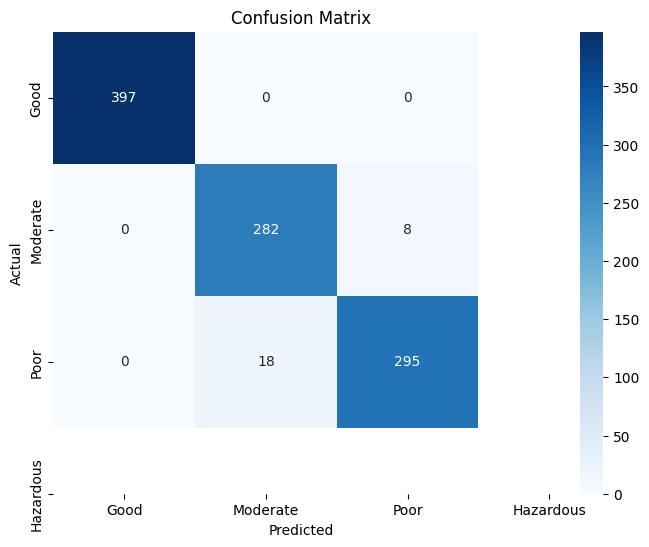

In [4]:


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good','Moderate','Poor','Hazardous'], yticklabels=['Good','Moderate','Poor','Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Ensure 'Air Quality' is in the correct format
df['Air Quality'] = pd.to_numeric(df['Air Quality'], errors='coerce')  # Converts to numeric (if '0' or '1' are strings)

# Filter for good air quality (0 or 1)
good_air_quality = df[df['Air Quality'].isin([0, 1])]  # If 'Good' corresponds to 0 or 1

# Convert the necessary columns to numeric values (if not already)
df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'Population_Density']] = \
    df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'Population_Density']].apply(pd.to_numeric, errors='coerce')

# Calculate the maximum values for each feature in the 'Good' air quality category
good_mean_values = good_air_quality[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'Population_Density']].mean()
print(good_mean_values)



PM2.5                             14.432714
PM10                              21.681629
NO2                               22.442743
SO2                                7.152971
CO                                 1.216320
Temperature                       27.173171
Humidity                          64.388914
Proximity_to_Industrial_Areas      9.832514
Population_Density               441.210286
dtype: float64


In [7]:
# Given values
NO2_ppb = 22  # NO2 concentration in ppb
SO2_ppb = 7 # SO2 concentration in ppb
CO_ppm = 1.2   # CO concentration in ppm (to be converted into mg/m³)
NO2_conversion_factor = 1.883  # Conversion factor from ppb to µg/m³ for NO2
SO2_conversion_factor = 2.624  # Conversion factor from ppb to µg/m³ for SO2
CO_conversion_factor = 1.145  # Conversion factor from ppm to mg/m³ for CO
temperature_C = 30  # Temperature in Celsius

# Convert temperature to Kelvin
temperature_K = temperature_C + 273.15

# Calculate the temperature adjustment factor
temperature_adjustment_factor = temperature_K / 273.15

# Convert NO2 from ppb to µg/m³ at 30°C
NO2_ug_per_m3 = NO2_ppb * NO2_conversion_factor * temperature_adjustment_factor

# Convert SO2 from ppb to µg/m³ at 30°C
SO2_ug_per_m3 = SO2_ppb * SO2_conversion_factor * temperature_adjustment_factor

# Convert CO from ppm to mg/m³ at 30°C
CO_mg_per_m3 = CO_ppm * CO_conversion_factor * temperature_adjustment_factor

NO2_ug_per_m3, SO2_ug_per_m3, CO_mg_per_m3



(45.97580779791324, 20.385353102690832, 1.5249060955518945)

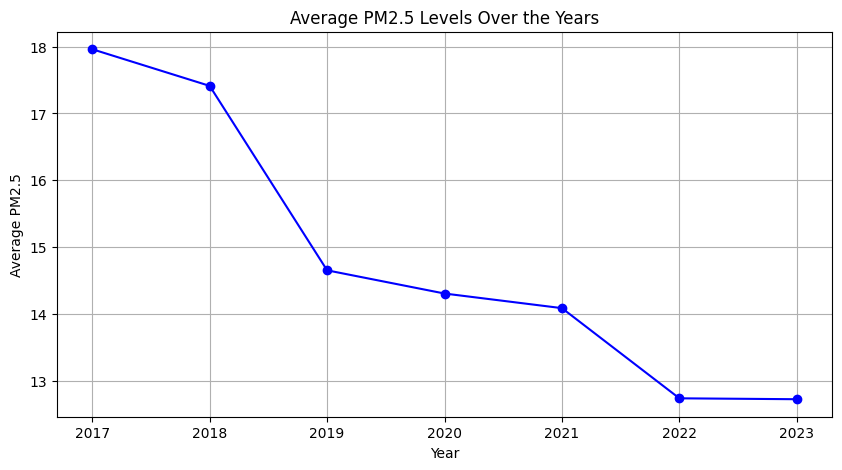

In [ ]:

# Compute the average PM2.5 per year (ignoring NaN values)
avg_pm2_5 = df1.iloc[:, 2:].mean()

# Plot the average PM2.5 over the years
plt.figure(figsize=(10, 5))
plt.plot(avg_pm2_5.index, avg_pm2_5.values, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 Levels Over the Years")
plt.grid(True)

# Show plot
plt.show()


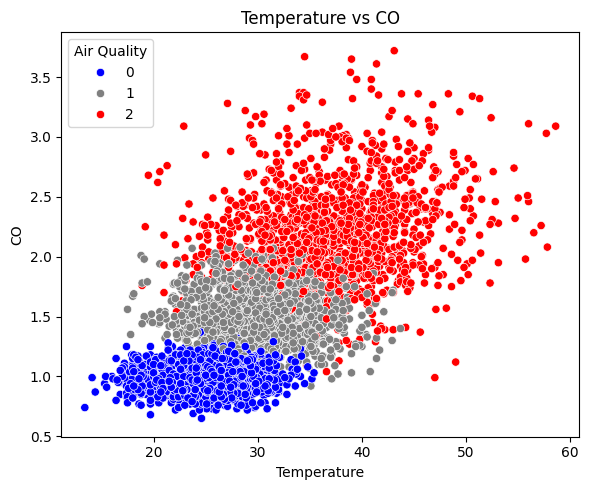

In [12]:

plt.figure(figsize=(6, 5))



sns.scatterplot(data=df, x='Temperature', y='CO', hue='Air Quality', palette={0: 'blue', 1: 'gray', 2: 'red'})


plt.title('Temperature vs CO')

# Display plots
plt.tight_layout()
plt.show()


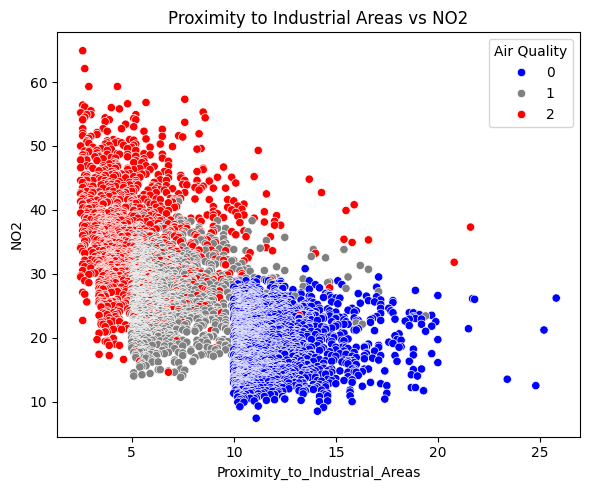

In [16]:

plt.figure(figsize=(6, 5))



sns.scatterplot(data=df, x='Proximity_to_Industrial_Areas', y='NO2', hue='Air Quality', palette={0: 'blue', 1: 'gray', 2: 'red'})


plt.title('Proximity to Industrial Areas vs NO2')

# Display plots
plt.tight_layout()
plt.show()

In [9]:
# Filter for cities with PM2.5 ≥ 15 in 2023
filtered_df1 = df1[df1["2023"] >= 15]

# Get the number of unique cities and countries
num_cities = filtered_df1["city"].nunique()
num_countries = filtered_df1["country"].nunique()

print(f"Number of cities: {num_cities}")
print(f"Number of countries: {num_countries}")


# Get the top 10 countries based on the number of affected cities
top_countries = filtered_df1["country"].value_counts()
# Print the top 10 countries
print("Top 10 countries with the most cities having PM2.5 ≥ 15 in 2023:")
print(top_countries)





Number of cities: 1611
Number of countries: 92
Top 10 countries with the most cities having PM2.5 ≥ 15 in 2023:
country
China                               468
India                               192
Thailand                            126
South Korea                          79
Poland                               72
                                   ... 
Democratic Republic of the Congo      1
Australia                             1
Macao SAR                             1
Germany                               1
France                                1
Name: count, Length: 92, dtype: int64


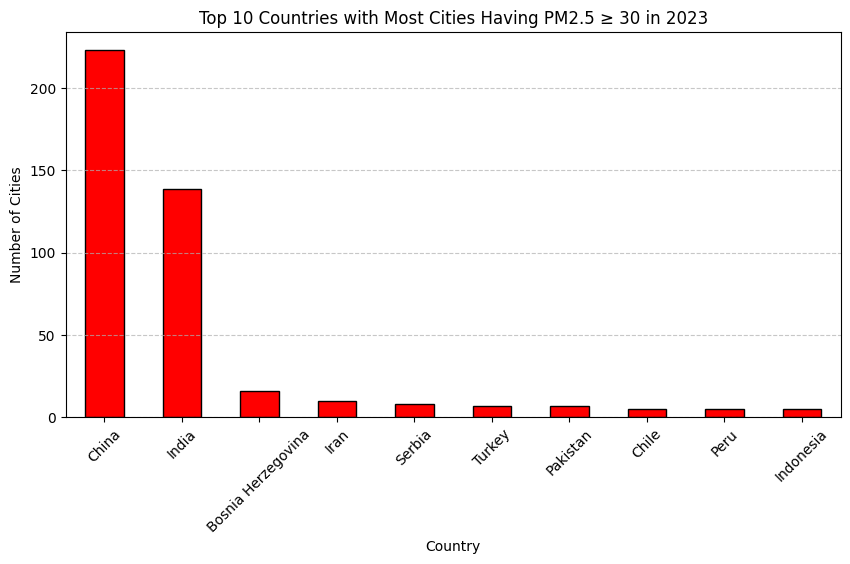

In [10]:

# Filter for cities with PM2.5 ≥ 30 in 2023
filtered_df1 = df1[df1["2023"] >= 30]

# Get the top 10 countries based on the number of affected cities
top_countries = filtered_df1["country"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10, 5))
top_countries.plot(kind="bar", color="red", edgecolor="black")

# Labels and title
plt.xlabel("Country")
plt.ylabel("Number of Cities")
plt.title("Top 10 Countries with Most Cities Having PM2.5 ≥ 30 in 2023")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


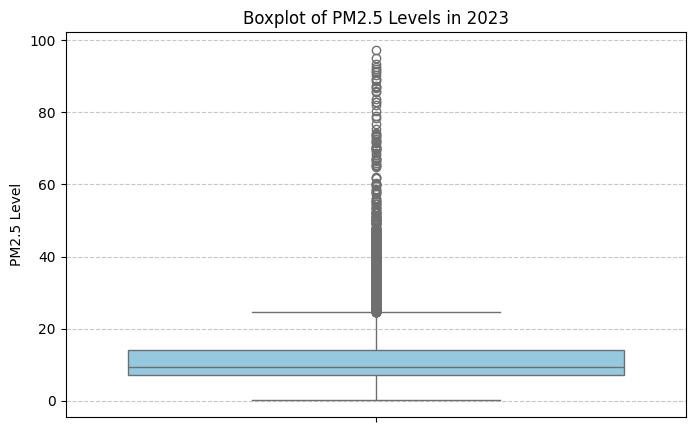

In [11]:


# Create a boxplot for PM2.5 levels in 2023
plt.figure(figsize=(8, 5))
sns.boxplot(y=df1["2023"], color="skyblue")

# Labels and title
plt.ylabel("PM2.5 Level")
plt.title("Boxplot of PM2.5 Levels in 2023")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()
